In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
img = cv2.imread("../opencv-np-workshop/data/img/regensburg.jpg")

In [3]:
img_flip = cv2.flip(img,1) # flip codes: -1, 0, 1

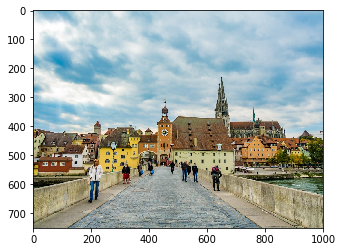

In [4]:
plt.imshow(img_flip[:,:,::-1])

## Two ways of adding images

- Adding as array (`np.arrray`) is done as **modulo**, i.e. sum(a+b) =  (a+b)%255.
- Addition in `cv2` is **saturated** sum(a+b) = max(255,a+b)

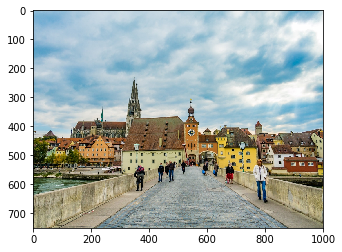

In [5]:
plt.imshow(img[:,:,::-1])

In [6]:
imgsum = cv2.add(img,img_flip)

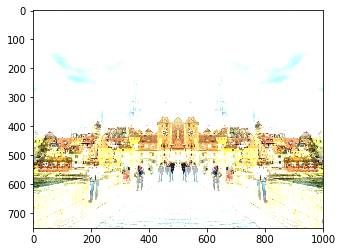

In [7]:
plt.imshow(imgsum[:,:,::-1])

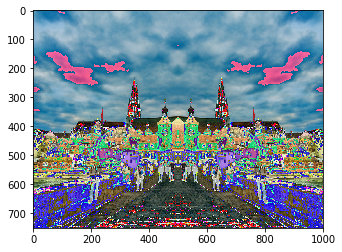

In [8]:
img_sum_np = img+img_flip
plt.imshow(img_sum_np[:,:,::-1])

## Subtraction

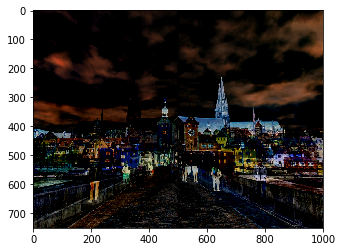

In [10]:
img_minus = cv2.subtract(img, img_flip) # Subtraction is saturated
plt.imshow(img_minus[:,:,::-1])

# Weighted addition

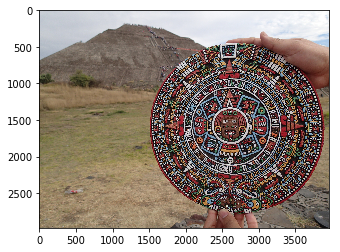

In [11]:
mexico = cv2.imread("../opencv-np-workshop/data/img/mexico.JPG")
plt.imshow(mexico[:,:,::-1])

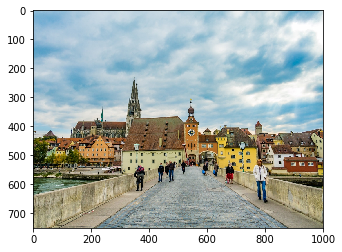

In [12]:
plt.imshow(img[:,:,::-1])

In [13]:
# Resize mexico into img.shape
mexico = cv2.resize(mexico,(img.shape[1], img.shape[0])) # constructor is cols,rows

In [19]:
alpha = 0.2 #weight of first image
beta = 0.8 #weight of second image
gamma = 0 #small added term

Operation: 
 
 $$saturate(\alpha*img1+\beta*img2+\gamma)$$


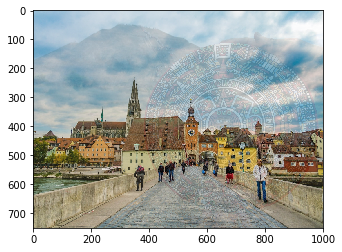

In [20]:
watermark = cv2.addWeighted(mexico, alpha, img, beta, gamma)
plt.imshow(watermark[:,:,::-1])

## Blending by using masks/bitwise operations

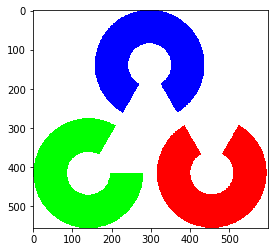

In [21]:
logo = cv2.imread("../opencv-np-workshop/data/img/opencv-logo.png")
plt.imshow(logo)

In [22]:
img.shape

(750, 1000, 3)

In [23]:
logo = cv2.resize(logo, None, fx=0.25, fy=0.25)

In [24]:
logo.shape

(139, 150, 3)

In [25]:
logo_rows, logo_cols, _ = logo.shape

In [29]:
# Choose a region in the Regensburg picture
roi = img[:logo_rows,:logo_cols]

In [30]:
roi.shape

(139, 150, 3)

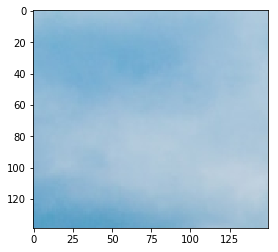

In [31]:
plt.imshow(roi[:,:,::-1])

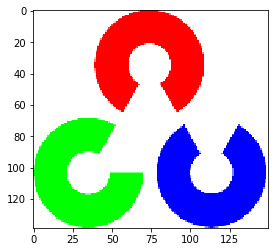

In [32]:
plt.imshow(logo[:,:,::-1])

In [47]:
logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY) # Convert to grayscale
_, mask = cv2.threshold(logo_gray, 150, 255, cv2.THRESH_BINARY) # Grayscale needed here!

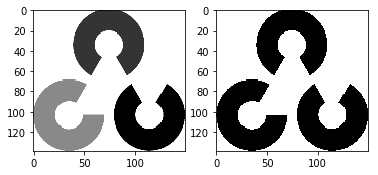

In [48]:
plt.subplot(121)
plt.imshow(logo_gray, cmap="gray")
plt.subplot(122)
plt.imshow(mask, cmap="gray")

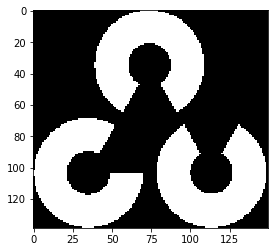

In [49]:
mask_inv = cv2.bitwise_not(mask) # Bitwise operation
plt.imshow(mask_inv, cmap="gray")

### Create blackout on the area for the logo

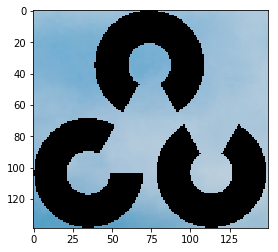

In [51]:
regensburg_bg = cv2.bitwise_and(roi,roi, mask=mask)
plt.imshow(regensburg_bg[:,:,::-1])

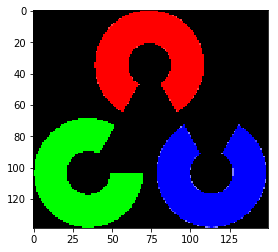

In [52]:
logo_fg = cv2.bitwise_and(logo,logo, mask=mask_inv)
plt.imshow(logo_fg[:,:,::-1])

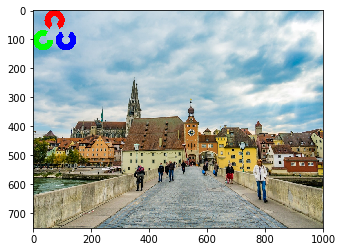

In [53]:
img[:logo_rows, :logo_cols] = cv2.add(regensburg_bg, logo_fg)
plt.imshow(img[:,:,::-1])

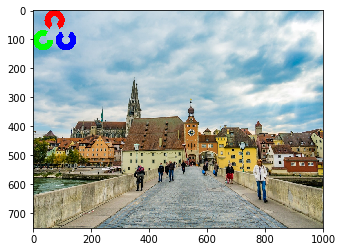

In [54]:
plt.imshow(img[:,:,::-1])